In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
import automin.optimizer as opt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
indep_var = np.random.normal(size = (100,2))
data = pd.DataFrame(data = indep_var, columns = ['indep_var1','indep_var2'])
data['dep_var'] = 2*data.indep_var1 + 3*data.indep_var2+np.random.normal(loc = 0, scale = 2, size=(len(data)))
data.head()

class MSE_Regression(opt.Model):
    def predict(self, beta1, beta2):
        return self.data['indep_var1']*beta1 + self.data['indep_var2']*beta2
    
    def loss(self, beta1, beta2):
        prediction = self.predict(beta1, beta2)
        return np.sum((prediction-self.data['dep_var'])**2)

In [ ]:
model = MSE_Regression(data)

r_all = opt.minimize_over_data(model, [10,10], 'Gradient Descend', 300, stochastic = False, lr = 1e-4)
r_all.x

In [14]:
r_stoch = opt.minimize_over_data(model, [10,10], 'Gradient Descend', 30, stochastic = True, lr = 1e-3)
r_stoch.x

/Users/joshfeldman/Harvard/Courses/cs207/cs207_FinalProject/automin/optimizer.py:36: UserWarning: optimization did not converge
  warnings.warn("optimization did not converge")


array([1.93051265, 2.72734908])

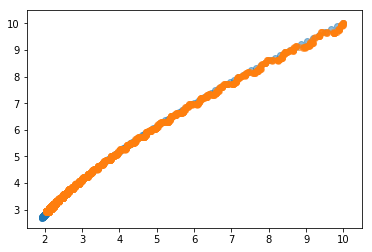

In [13]:
plt.scatter(np.array(r_all.val_rec)[:,0],np.array(r_all.val_rec)[:,1], alpha = .5)
plt.scatter(np.array(r_stoch.val_rec)[:,0],np.array(r_stoch.val_rec)[:,1], alpha = .5)